In [1]:
# We'll bring in the usual modules, but also seaborn and scipy.stats
# Note that your plots will look a bit different when seaborn is loaded!
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# And set matplotlib to display inline for now
%matplotlib inline

## Plotting distributions of random numbers

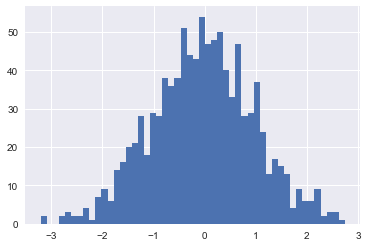

In [2]:
# Let's start by generating some random data:

k = 1000
x = np.random.normal(size=k)
_ = plt.hist(x,bins=50)

In [3]:
# Play along!  Create the same plot as above, but with 2000 observations, and 60 bins

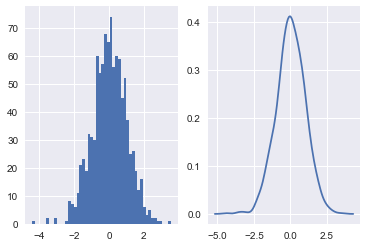

In [4]:
# The irregularity of a histogram can be "smoothed" using a kernel density estimation plot:
k = 1000
x = np.random.normal(size=k)
plt.subplot(121)
_ = plt.hist(x,bins=50)
plt.subplot(122)
ax = sns.kdeplot(x)


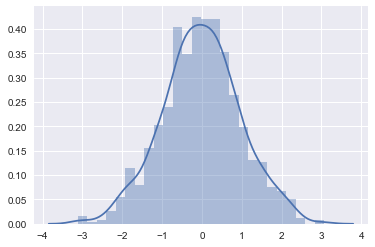

In [5]:
# You can combine these together, which is often very informative
k = 1000
x = np.random.normal(size=k)
ax = sns.distplot(x)

## Controlling distributions

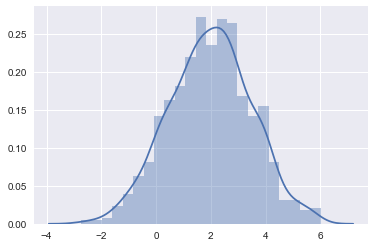

In [6]:
# Specifying the location and scale parameter controls the center and the width of the distribution

k = 1000
x = np.random.normal(loc=2,scale=1.5,size=k)
ax = sns.distplot(x)

In [7]:
# Play along!  Generate 3 different distributions and plots to explore how the location and scale parameters work.

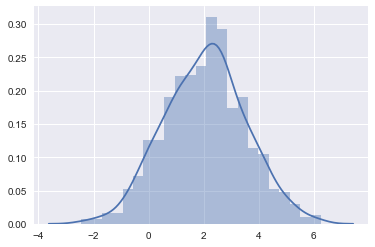

In [8]:
# You can control these mathematically as well:
mu, sigma = 2,1.5
x = sigma * np.random.normal(size=k) + mu
ax = sns.distplot(x)

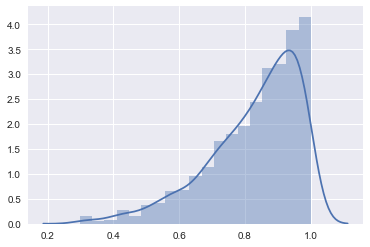

In [9]:
# There are many other types of distribution.  Here's the beta distribution:
x = np.random.beta(5,1,1000)
sns.distplot(x)

In [10]:
# Play along!  Look at the beta distribution examples on the wiki page, and draw two of the plots you see there:

In [11]:
# Play along!  What's an example of when a beta distribution might be used?

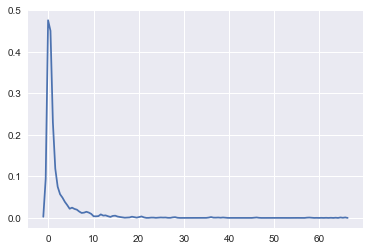

In [12]:
# Weibull distribution.  Tinker with the first parameter to control shape!

x = np.random.weibull(.5,1000)
ax = sns.kdeplot(x)

In [13]:
# Play along!  What's an example of when a Weibull distribution might be used?

## Make a true PDF

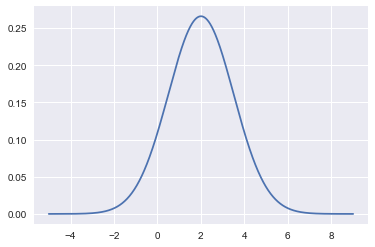

In [14]:
# Rather than generating random numbers, you can generate curves based on the true PDF
x = np.linspace(-5,9,1000)
y = stats.norm.pdf(x,loc=2,scale=1.5)
plt.plot(x,y)

## Generating data, and fitting a curve to it

1.94598461745 1.50955192756


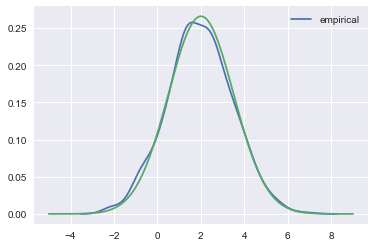

In [15]:
# Play along!  Annotate this code block to explain what's going on in each line

loc,scale = 2,1.5
n = np.random.normal(loc,scale,1000)
empirical_loc,empirical_scale = stats.norm.fit(n)
print(empirical_loc,empirical_scale)

x = np.linspace(-5,9,1000)
y = stats.norm.pdf(x,loc,scale)

sns.kdeplot(n,label='empirical')
plt.plot(x,y,label='fitted')

In [16]:
# Play along!  What happens to the fit as you increase or decrease the sample size?  Use plots to illustrate your answer. 

# Calculating Statistics

For these exercises, <a href="http://www.spc.noaa.gov/gis/svrgis/
">download</a> the tornado dataset (torn.zip) from the Storm Prediction Center, and, using Excel, convert the DBF to a CSV file.  
(In the future, we'll be using GeoPandas to handle shapefile reads.)

In [17]:
df = pd.read_csv('torn.csv')

In [18]:
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,1,3.0,0.0,34.40,-94.37,0.00,0.00,0.6,17,0
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,0,5.0,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0


In [19]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'fc'],
      dtype='object')

In [20]:
df1 = df.loc[:,['mag','wid','len','slat','slon']]
group = df1.groupby(by='mag')
group.describe()

len                                                            slat  \
       count       mean        std   min    25%   50%    75%    max    count   
mag                                                                            
0    27933.0   1.020364   2.680975  0.00   0.10   0.2   1.00  103.5  27933.0   
1    20221.0   3.197955   6.046221  0.00   0.30   1.0   3.67  176.4  20221.0   
2     8924.0   6.959467  11.370321  0.06   0.80   3.0   9.00  234.7   8924.0   
3     2412.0  14.963802  17.481426  0.01   3.80   9.6  19.40  169.7   2412.0   
4      565.0  27.560850  28.677197  0.10   9.85  18.9  33.30  202.1    565.0   
5       59.0  39.007797  34.723600  0.10  14.75  30.3  52.70  202.5     59.0   

                 ...     slon             wid                                \
          mean   ...      75%    max    count        mean         std   min   
mag              ...                                                          
0    37.300694   ...   -88.55 -64.90  27933.0   41.561379   65.380177   0.0   
1    37.023399   ...   -85.64 -66.00  20221.0   95.522922  148.651471   0.0   
2    36.992674   ...   -86.27 -67.20   8924.0  175.658897  256.255289   0.0   
3    36.963304   ...   -87.27 -70.97   2412.0  363.320066  441.522527   0.0   
4    37.998655   ...   -87.01 -72.17    565.0  588.644248  563.137395  10.0   
5    37.800169   ...   -88.14 -81.15     59.0  839.067797  597.833643  10.0   

                                   
       25%    50%     75%     max  
mag                                
0     10.0   25.0    50.0  2500.0  
1     20.0   50.0   100.0  3000.0  
2     30.0  100.0   200.0  3520.0  
3    100.0  200.0   440.0  4576.0  
4    200.0  400.0   880.0  4400.0  
5    450.0  583.0  1320.0  3000.0  

[6 rows x 32 columns]

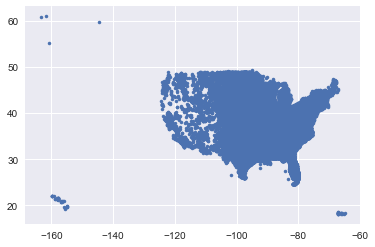

In [21]:
plt.plot(df.slon,df.slat,'.')

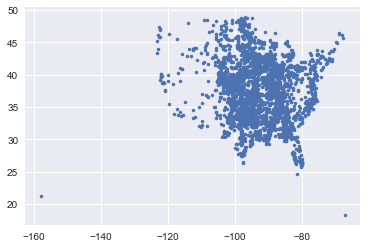

In [22]:
idx = df.yr > 2012
plt.plot(df.slon[idx],df.slat[idx],'.')

In [23]:
# Play along!  Can you draw this "map" showing only points where the longitude is less than -130?

## Correlations

In [24]:
np.corrcoef(df.len,df.wid)

array([[ 1.       ,  0.3635912],
       [ 0.3635912,  1.       ]])

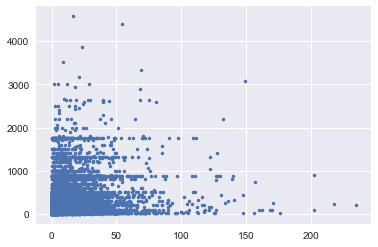

In [25]:
plt.plot(df.len,df.wid,'.')

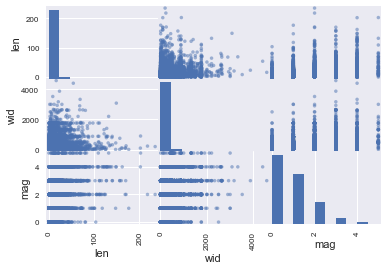

In [26]:
# Matplotlib, pandas, and seaborn can all do correlation matrices
_  = pd.plotting.scatter_matrix(df.loc[:,['len','wid','mag']])

In [27]:
# Pandas has its own built-in correlation matrix calculation
df.ix[:,['len','wid','mag']].corr(method='pearson')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,len,wid,mag
len,1.000000,0.363591,0.437395
wid,0.363591,1.000000,0.424948
mag,0.437395,0.424948,1.000000


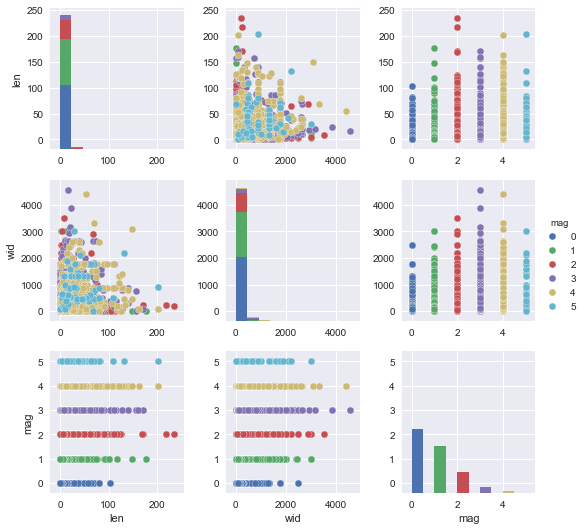

In [28]:
# And seaborn has its own built in correlation matrix
sns.pairplot(df.ix[:,['len','wid','mag']],hue='mag')

In [29]:
# Pearson
r,p = stats.pearsonr(df.len,df.wid)
print(r,p)

0.363591198776 0.0


In [30]:
# Spearman, rank-based
r,p = stats.spearmanr(df.len,df.wid)
print(r,p)

0.618400872656 0.0


In [31]:
# Play along!  Calculate a two new columns in the tornado dataframe as the log of length and the log of width

In [32]:
# Play along!  Check for correlation between these two items, both pearson, and spearman

r: 0.0616548900448 , p: 0.542274240615


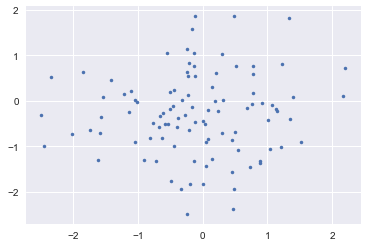

In [33]:
# You can rerun this codeblock to generate two vectors of random numbers (mean of zero, std of 1)
# and plot them / run a correlation
x,y = np.random.normal(0,1,(2,100))
r,p = stats.pearsonr(x,y)
print('r:',r,', p:',p)
plt.plot(x,y,'.')

# Rerun this block and try to get a low p-value!

## T-Tests

-3.89251090168 0.000135529063901


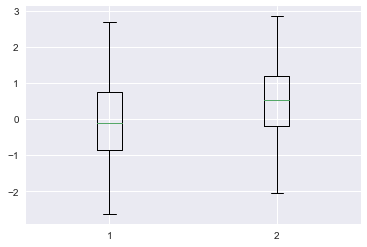

In [34]:
# T-tests compare two groups for a difference in mean.  There are a few varieties.

# Define two vectors, one with a mean of 0, one with a mean of 0.5
x = np.random.normal(0  ,1,100)
y = np.random.normal(0.5,1,100)

# Boxplots are a convenient way to examine differences.  It's often a handier view than either
# the histogram or the kernel density plot
_ = plt.boxplot((x,y))

t,p = stats.ttest_ind(x,y)
print(t,p)

In [35]:
# Play along!  Copy the above code, and add a third "box".  Change the parameters for the random numbers to change the boxes.

In [2]:
# Paired vs. unpaired t-tests
# Paired implies that the two groups are not independent:

x = np.random.normal(loc=12.1,scale=1.8,size=100)
growth_serum = np.random.normal(.1,.05,100)
y = x + growth_serum

t,p = stats.ttest_rel(x,y)
print('paired')
print('t:',t,',  p:',p)

t,p = stats.ttest_ind(x,y)
print('\nassuming unpaired (even though they are really paired!)')
print('t:',t,',  p:',p)

# Not a precise comparison, but close enough?
x = np.random.normal(12.1,1.8,100)
y = np.random.normal(12.2,1.85,100)
t,p = stats.ttest_ind(x,y,equal_var=False)
print('\na true unpaired test')
print('t:',t,',  p:',p)




paired
t: -20.6876866266 ,  p: 1.00540037037e-37

assuming unpaired (even though they are really paired!)
t: -0.423634471624 ,  p: 0.672292245611

a true unpaired test
t: 1.15159804742 ,  p: 0.25088508056


In [37]:
# You can also use a t-test to test for difference from a specific mean
before_rats = np.random.normal(loc=12.1,scale=1.8,size=100)
after_rats = x + np.random.normal(.1,.05,100)
difference = after_rats - before_rats

print('difference from mean 0')
t,p = stats.ttest_1samp(difference,popmean=0)
print(t,p)

print('after_rats')
t,p = stats.ttest_1samp(after_rats,popmean=12.1)
print(t,p)


# Compare to paired t-test
print('paired t-test')
t,p = stats.ttest_rel(before_rats,after_rats)
print(t,p)


difference from mean 0
-1.01068274876 0.314632122505
after_rats
0.127411315406 0.898873300785
paired t-test
1.01068274876 0.314632122505


assuming equal variances, even though it's not true
-1.31463876598 0.190152046535
assuming unequal variances
-1.31463876598 0.190573537513


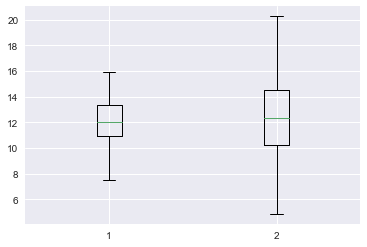

In [38]:
# T-tests with unequal variances
x = np.random.normal(12.1,1.8,100)
y = np.random.normal(13.1,3.6,100) # Mean + 1, SD * 2

t,p = stats.ttest_ind(x,y)
print("assuming equal variances, even though it's not true")
print(t,p)

t,p = stats.ttest_ind(x,y,equal_var=False)
print("assuming unequal variances")
print(t,p)


_ = plt.boxplot((x,y))


Text(0,0.5,'p-value')

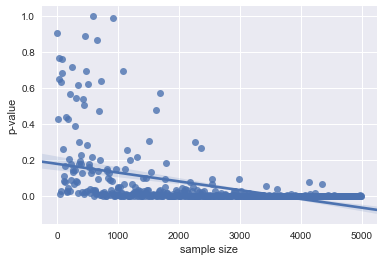

In [39]:
# How does sample size affect the calculation of p-values

a = .1
ss = np.arange(2,5000,10)
results = np.zeros(np.shape(ss))
for i,sample_size in enumerate(ss):
    x = np.random.normal(0,1,sample_size)
    y = np.random.normal(a,1,sample_size)
    t,p = stats.ttest_ind(x,y)
    results[i] = p
sns.regplot(ss,results)
sns.plt.xlabel('sample size')
sns.plt.ylabel('p-value')

In [40]:
# Play along!  In your own words, interpret what happened in the above code block

## ANOVA

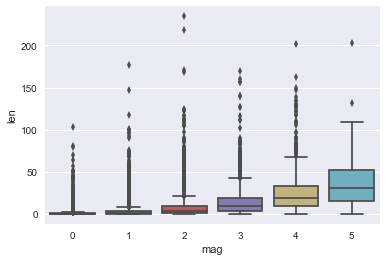

In [41]:
df = pd.read_csv('torn.csv')

sns.boxplot(x="mag",y="len",data=df)

151.249132297 2.57381956624e-65


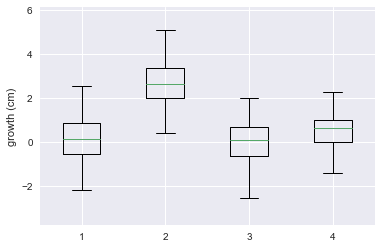

In [42]:
# ANOVA - Are ANY of these different from the others?
milk = np.random.normal(0.0,1,100)
cheerios = d = np.random.normal(2.5,1,100)
cheese = np.random.normal(0.0,1,100)
tacos = np.random.normal(0.5,1,100)
_ = plt.boxplot((milk,cheerios,cheese,tacos))
plt.ylabel('growth (cm)')

f, p = stats.f_oneway(milk,cheerios,cheese,tacos)
print(f,p)

In [43]:
# Effect sizes
a = .1
x = np.random.normal(12.1,1.8,100)
y = np.random.normal(12.1 + a,1.8,100)

t,p = stats.ttest_ind(x,y)
d = abs(np.nanmean(y)-np.nanmean(x)) / np.sqrt((np.std(x)**2 + np.std(y)**2)/2)
print('ttest:',t,p)
print('cohen''s d:',d)
print('expected:',a/1.8)

ttest: -0.472717984353 0.636935049772
cohens d: 0.0671892085989
expected: 0.05555555555555556


In [44]:
np.std?

In [45]:
d = (np.nanmean(y)-np.nanmean(x)) / np.mean((np.std(x),np.std(y)))
d

0.067189924620726982

In [46]:
(np.nanmean(y)-np.nanmean(x)) / np.sqrt((np.std(x)**2 + np.std(y)**2)/2)

0.06718920859887699

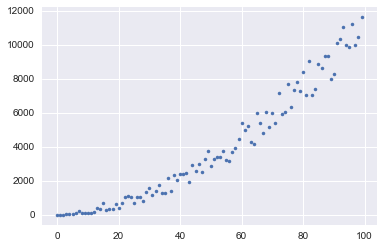

In [47]:
x = np.arange(100)
y = x**2 + 30 * np.random.rand(100) * x
plt.plot(x,y,'.')

## Regression

LinregressResult(slope=1.1374559718279975, intercept=233.11864048083726, rvalue=0.98960779873076821, pvalue=2.3331387323372789e-84, stderr=0.016695366610904452)


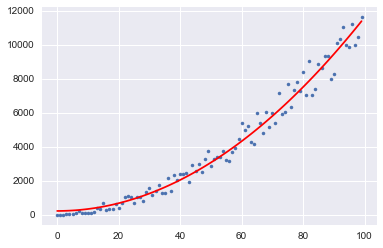

In [48]:
result = stats.linregress(x**2,y)
print(result)
plt.plot(x,y,'.')
plt.plot(x,result.slope*x**2 + result.intercept,'r-')

In [49]:
stats.op

AttributeError: module 'scipy.stats' has no attribute 'op'

In [ ]:
import statsmodels.formula.api as smf

x = np.arange(100)
y = x**2 + 30 * np.random.rand(100) * x
df = pd.DataFrame({'x':x,'y':y})
est = smf.ols(formula='y ~ x**2', data=df).fit()
est.summary()

In [ ]:
df = pd.read_csv('data/torn.csv')
est = smf.ols(formula='len ~ wid + mag', data=df).fit()
est.summary()

In [ ]:
df = pd.read_csv('torn.csv')
sample = df.ix[df['mag']==5,'len'] # Extract lengths for only F5s
_,_,_ = plt.hist(sample)
len(sample)

In [ ]:
# How do we estimate the distribution for this?  The confidence interval around the mean, etc?

# For a number of repetitions (k), we draw - with replacement - from our sample.
# The number of "draws" is equal to the size of our original sample.
k = 10000
# Prepare a 2D matrix to hold all of the draws
bootstrap = np.zeros((len(sample),k))

# For k times, pull sample
for i in range(k):
    bootstrap[:,i] = np.random.choice(sample,size=len(sample))

# Calculate the means for each column and substract the sample mean
m = np.mean(sample) - np.mean(bootstrap,axis=0)

# Calculate the percentiles (and add to the sample mean for correct location)
np.percentile(m,[10,90]) + np.mean(sample)

_,_,_ = plt.hist(m+np.mean(sample),bins=50)